In [300]:
#importing the modules 

import skimage.morphology as morpho
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray,label2rgb
from skimage.measure import regionprops,label,regionprops_table
from skimage.filters import sobel,threshold_otsu,threshold_li,median,gaussian,prewitt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.ndimage import label as lb
from skimage.feature import canny



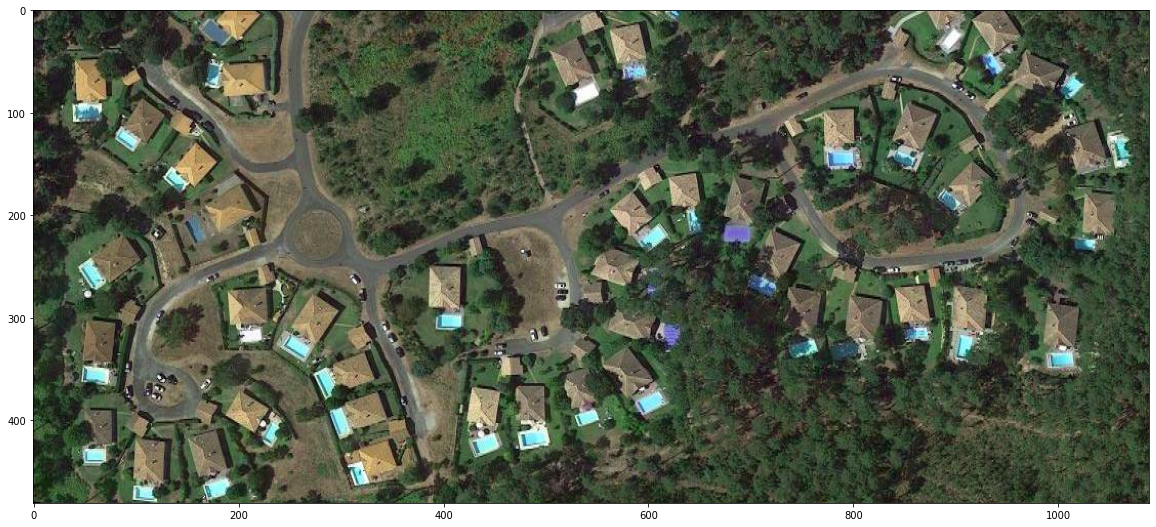

In [192]:
plt.figure(figsize=(20,20))

image=io.imread('moliets.png')

plt.imshow(image)
plt.show()

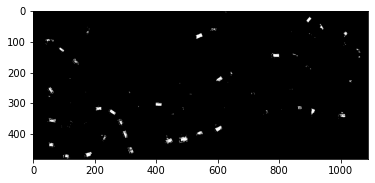

In [211]:
image_blue=image[:,:,2]
mask_blue=image_blue>235
plt.imshow(mask_blue,'gray')

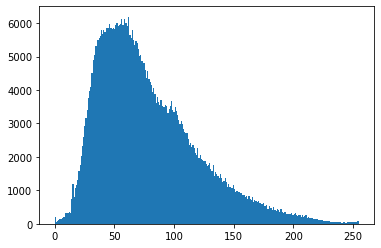

In [217]:
image_rouge=image[:,:,0]
plt.hist(image_rouge.ravel(),bins=256)
plt.show()

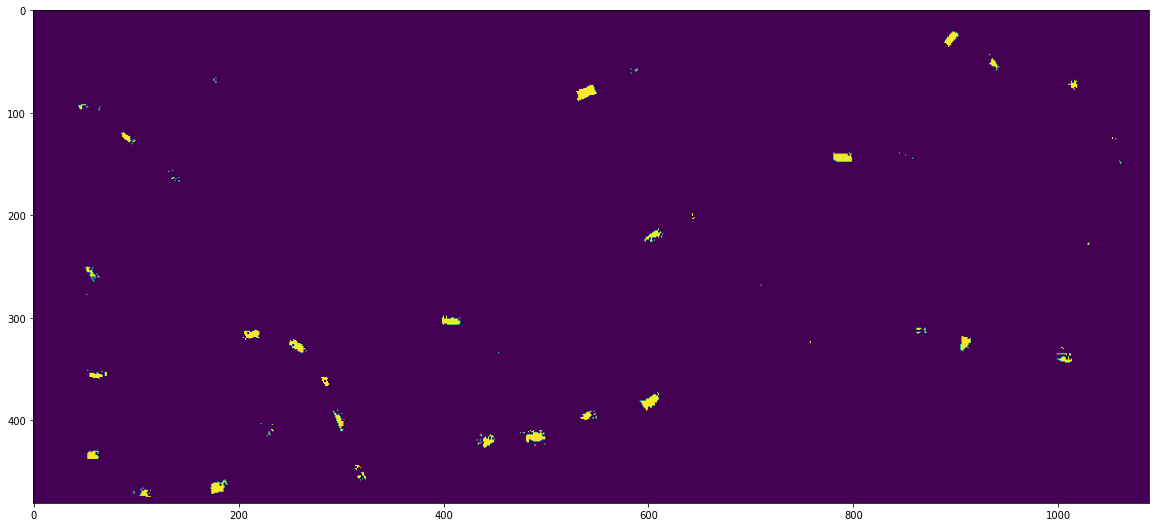

In [228]:
plt.figure(figsize=(20,20))

bruit_elim=morpho.erosion(mask_blue,morpho.disk(1.3))

plt.imshow(bruit_elim)

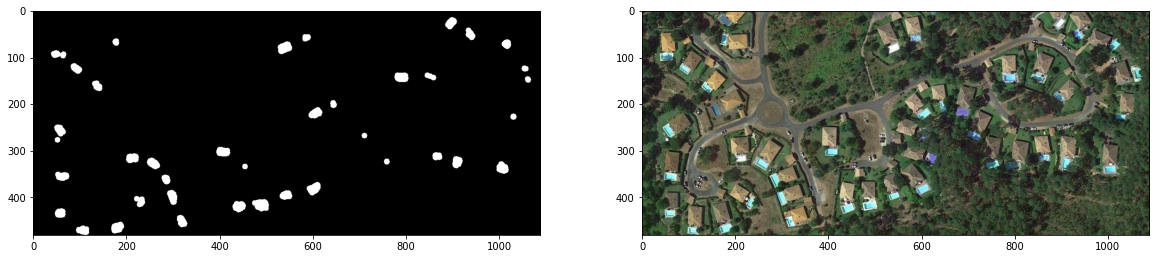

In [235]:
fig=plt.figure(figsize=(20,20))
dilation=morpho.dilation(bruit_elim,morpho.disk(6))
dilation2=morpho.opening(dilation,morpho.disk(4.3))
plt.subplot(1,2,1)
plt.imshow(dilation,'gray')
plt.subplot(1,2,2)
plt.imshow(image)

In [248]:
label_image,n=lb(dilation2)
print(n)

39


In [239]:
prop = regionprops_table(label_image, properties=('area','orientation'))
dataframe=pd.DataFrame(prop)
dataframe.head()

,area,orientation
0,432,-0.701312
1,379,0.506020
2,226,-1.257357
3,168,0.142395
4,311,0.541011


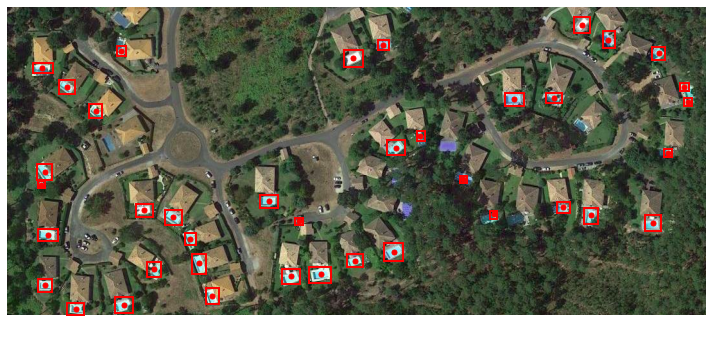

In [250]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        centroid = region.centroid
        # Add line to centroid
        ax.plot(centroid[1], centroid[0], 'ro', markersize=5)  # 'go' for green dot
        
ax.set_axis_off()
plt.tight_layout()
plt.show()

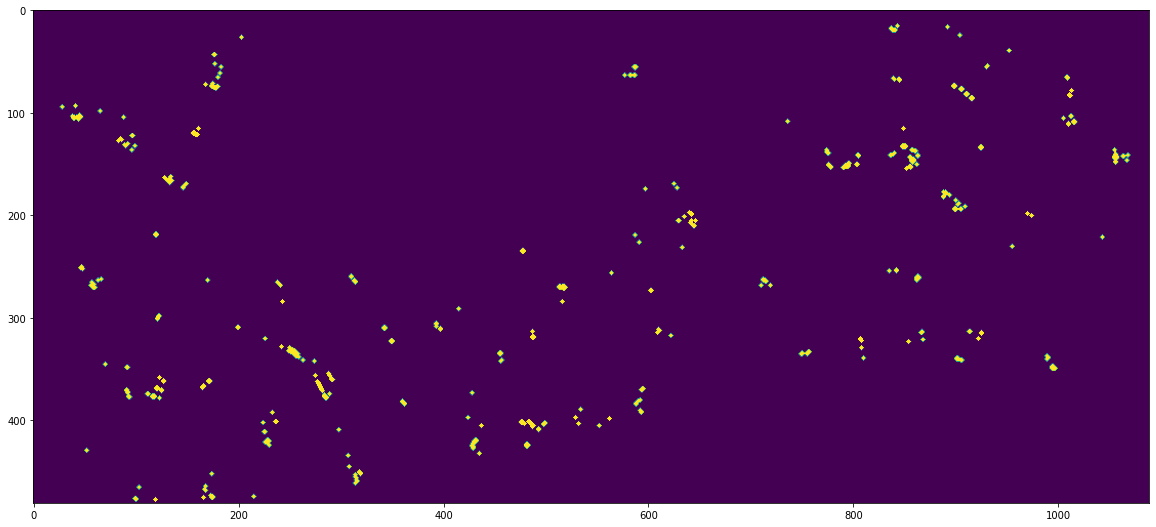

In [307]:
plt.figure(figsize=(20,20))
grad=canny(image_blue>200)
grad=median(grad,morpho.disk(2))
#eroded_img=morpho.erosion(grad,morpho.disk(2))

grad=morpho.dilation(grad,morpho.disk(2))
label_image,n2=lb(grad)
plt.imshow(grad)

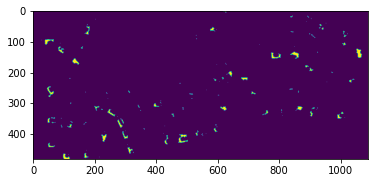

In [305]:
dl=morpho.erosion(grad,morpho.disk(4))

plt.imshow(dl)

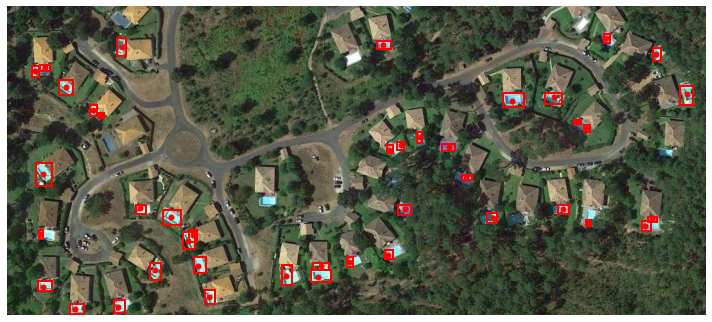

In [292]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 50:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        centroid = region.centroid
        # Add line to centroid
        ax.plot(centroid[1], centroid[0], 'ro', markersize=5)  # 'go' for green dot
        
ax.set_axis_off()
plt.tight_layout()
plt.show()

(array([  39.,   53.,   47.,   48.,   39.,   73.,   82.,   73.,  105.,
         145.,  148.,  209.,  241.,  305.,  271.,  352.,  440.,  631.,
         705.,  908., 1015., 1187., 1435., 1610., 1811., 2041., 2373.,
        2667., 2973., 3170., 3326., 3756., 3932., 3970., 4172., 4219.,
        4381., 4725., 4717., 4705., 4528., 4526., 4743., 4644., 4789.,
        4550., 4679., 4629., 4592., 4358., 4592., 4535., 4507., 4485.,
        4674., 4696., 4825., 4802., 4789., 4833., 4927., 5139., 5105.,
        5161., 5191., 5425., 5116., 5324., 5276., 5336., 5272., 5606.,
        5500., 5551., 5427., 5503., 5364., 5381., 5566., 5208., 5250.,
        5292., 5061., 5095., 5215., 5055., 5042., 5167., 5229., 5365.,
        5487., 5424., 5394., 5514., 5557., 5541., 5462., 5557., 5574.,
        5492., 5463., 5302., 5001., 4851., 4688., 4472., 4310., 4026.,
        3983., 3804., 3670., 3486., 3234., 3121., 2934., 2826., 2681.,
        2648., 2485., 2444., 2348., 2181., 2247., 2078., 1976., 1904.,
      

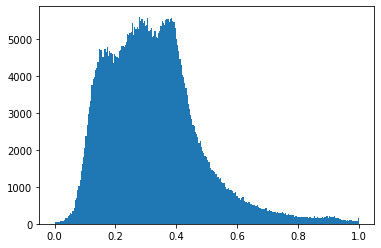

In [272]:
plt.hist(gray_image.ravel(),bins=256)

In [262]:

mk = morph, 50)
plt.figure(figsize=(20,20))
plt.imshow(mk)

TypeError: Only bool or integer image types are supported. Got float64.

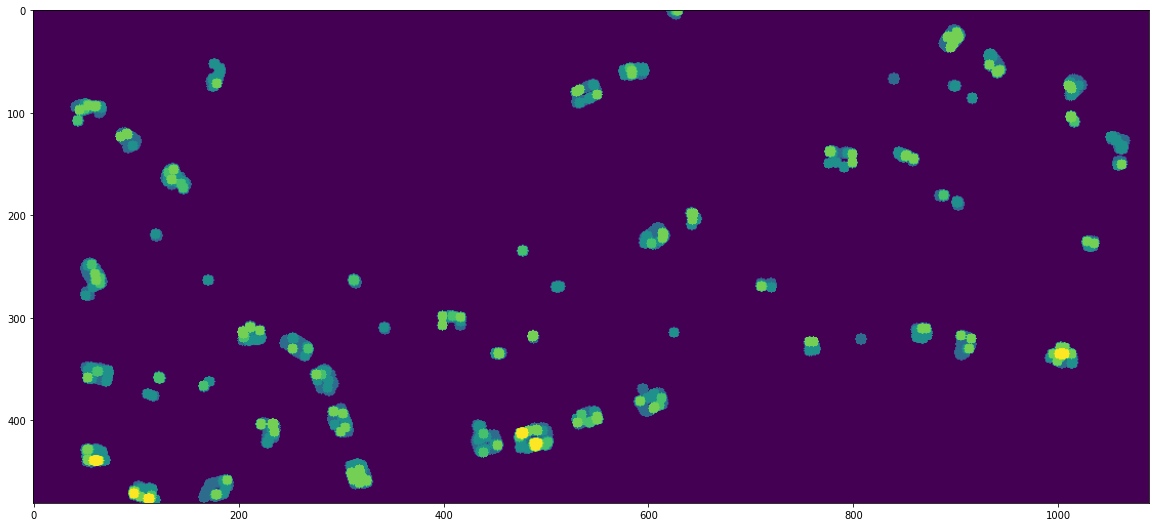

In [260]:
dilated_img=morpho.dilation(eroded_img,morpho.disk(5))
plt.figure(figsize=(20,20))
plt.imshow(dilated_img)

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = data.coins()
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)